# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Load and Read the Dataset

In [2]:
# load the dataset

df = pd.read_csv('data/london_crime_by_lsoa.csv')

In [3]:
# show dataset

df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
# show the top 5 rows of the dataset

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# getting basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# getting the shape of dataset

df.shape

(13490604, 7)

# Data Preprocessing

In [7]:
# checking the standard missing value

df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
# Checking the non-standard missing value

miss_val = ['n/a', 'NaN', 'na', '']
df=pd.read_csv('data/london_crime_by_lsoa.csv', na_values=miss_val)
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

*As we can see, there's no missing value in this dataset, so we can continue to other preprocessing activities.*

In [10]:
# renaming column as if make it understandable and readable

df.rename(columns={'borough':'region', 'value':'reported_count'}, inplace=True)

In [11]:
# getting the dataset that has a reported_count of 1

df_crime = df[df.reported_count == 1]
df_crime

,lsoa_code,region,major_category,minor_category,reported_count,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [12]:
# find out total crimes in each region
df_crime['region'].value_counts()

Croydon                   94786
Lambeth                   92277
Ealing                    87985
Southwark                 85661
Barnet                    83693
Newham                    82695
Lewisham                  81911
Brent                     80637
Enfield                   77162
Wandsworth                77134
Bromley                   73163
Waltham Forest            71396
Tower Hamlets             71257
Hackney                   71207
Haringey                  70662
Hillingdon                68604
Redbridge                 67682
Greenwich                 66340
Hounslow                  66061
Islington                 65069
Camden                    63721
Westminster               57206
Hammersmith and Fulham    55175
Havering                  55102
Barking and Dagenham      54501
Bexley                    51715
Harrow                    50786
Merton                    50453
Kensington and Chelsea    47735
Sutton                    43870
Richmond upon Thames      42952
Kingston

In [13]:
# getting the dataset's shape after preprocessing

df_crime.shape

(2141789, 7)

# Data Viz

## Question 1
What were the top 5 regions that had highest crimes in 2016?

In [14]:
highestCrimes = df_crime[df_crime.year==2016].region.value_counts()

In [15]:
highestCrimes.head(5)

Lambeth      10644
Croydon      10520
Ealing        9907
Southwark     9849
Barnet        9677
Name: region, dtype: int64

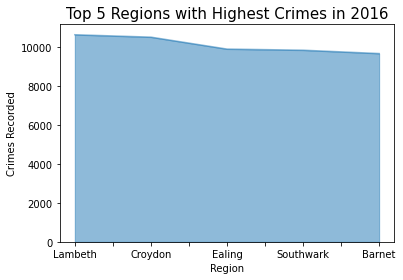

In [16]:
highestCrimes.head().plot(kind='area', stacked=False)
plt.title('Top 5 Regions with Highest Crimes in 2016', size=15)
plt.xlabel('Region')
plt.ylabel('Crimes Recorded')
plt.show()

As we can see on the Area plot, Region **Lambeth** had the highest crimes in 2016
followed by **Croydon**, **Ealing**, **Southwark**, and **Barnet**.

## Question 2
Show the total crime per year!

In [17]:
# Show the total crime per year

df_crime.groupby(['year']).sum()

,reported_count,month
year,,
2008,240966,1555400
2009,238097,1544166
2010,235513,1523887
2011,234747,1534237
2012,234714,1522957
2013,232720,1518412
2014,237515,1557360
2015,241347,1577584
2016,246170,1604326


In [18]:
# Beacuse we dont need the 'month' column, we can drop it
df_crime_perYear = df_crime.groupby(['year']).sum()
df_crime_perYear.drop(columns='month', inplace=True)
df_crime_perYear

,reported_count
year,
2008,240966
2009,238097
2010,235513
2011,234747
2012,234714
2013,232720
2014,237515
2015,241347
2016,246170


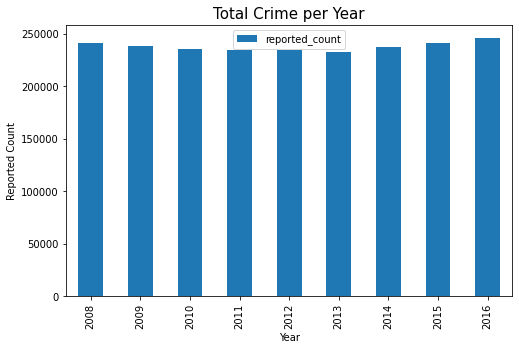

In [19]:
df_crime_perYear.plot(kind='bar', stacked=False, figsize=(8,5))
plt.title('Total Crime per Year', size=15)
plt.xlabel('Year')
plt.ylabel('Reported Count')
plt.show()

As we can see in the bar chart, from 2008 to 2013 there was a decrease in crime reported, however starting from 2014 there was an increase in crime reported until 2016.

## Question 3
What is the proportion of the major category crime in 2016

In [20]:
maj_category = df_crime[df_crime.year==2016].major_category.value_counts()

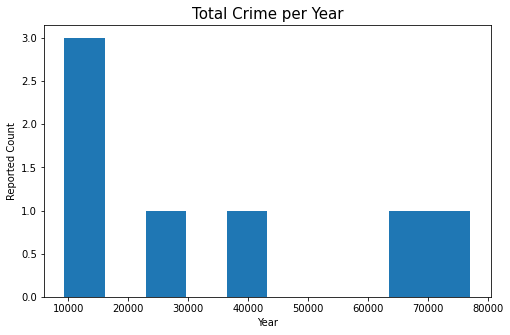

In [21]:
maj_category.plot(kind='hist', stacked=False, figsize=(8,5))
plt.title('Total Crime per Year', size=15)
plt.xlabel('Year')
plt.ylabel('Reported Count')
plt.show()

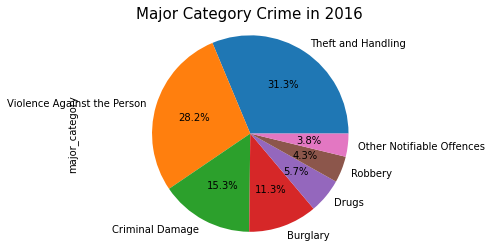

In [23]:
maj_category.plot.pie(autopct='%1.1f%%',)
plt.title('Major Category Crime in 2016', size=15)
plt.axis('equal')
plt.show()

As we can see on the pie chart, **Theft and Handling** is the highest in the Major Category in 2016, followed by **Violence Against the Person**, **Criminal Damage**, and so on.

## Question 4
How many criminals per region?

In [27]:
crims = df_crime.groupby(['year']).sum()['reported_count'].sort_values(ascending=False)

In [28]:
## see the statistic data
crims.describe()

count         9.000000
mean     237976.555556
std        4219.471623
min      232720.000000
25%      234747.000000
50%      237515.000000
75%      240966.000000
max      246170.000000
Name: reported_count, dtype: float64

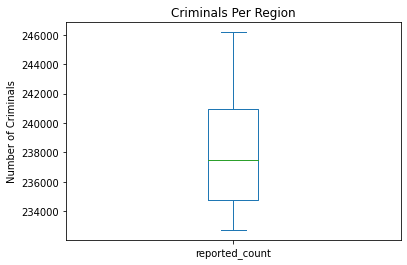

In [29]:
crims.plot(kind='box')
plt.title('Criminals Per Region')
plt.ylabel('Number of Criminals')
plt.show()

As we can see,
- the minimum number of criminals is 232720
- 25% of the criminals number during 2008-2016 was 234747 (1st Quartile)
- 50% of the criminals number diring 2008-2016 was 237515 (2nd Quartile)
- 75% of tthe criminals number during 2008-2016 was 240966 (3rd Quartile)
- also the maximum number of criminals is on 246170